In [39]:
import pandas as pd
from pandas import DataFrame
import os

databases = ['bloons_data_level_1_0to90','bloons_data_level_9_-50to10','bloons_data_level_13_45to80']
database_name = databases[2]
database_path = os.path.join(os.getcwd(),'database',database_name+".csv")
database = pd.read_csv(database_path)
database

,generation,iteration,seq,angle,throwSec,poppedBloons,totalPoppedBloons
0,1,1,1,-0.643931,0.736505,8,8
1,1,1,2,-0.836577,0.582760,0,8
2,1,1,3,-0.638843,0.584748,1,9
3,1,1,4,-0.428818,0.412612,-9,9
4,1,2,1,-0.744740,0.385353,3,3
...,...,...,...,...,...,...,...
395,10,9,4,0.049139,0.220873,0,29
396,10,10,1,-0.069151,0.272214,8,8
397,10,10,2,-0.116709,0.651962,10,18
398,10,10,3,-0.435171,0.345824,12,30


In [40]:
database_refined = database[(database['seq'] == max(database['seq']))]
database_success = database_refined[(database_refined['poppedBloons'] >= 0)]
database_refined

,generation,iteration,seq,angle,throwSec,poppedBloons,totalPoppedBloons
3,1,1,4,-0.428818,0.412612,-9,9
7,1,2,4,-0.371223,0.520671,-10,10
11,1,3,4,0.028739,0.222703,-20,20
15,1,4,4,0.151651,0.571734,-15,15
19,1,5,4,0.000004,0.561600,-28,28
...,...,...,...,...,...,...,...
383,10,6,4,0.051800,0.220873,0,27
387,10,7,4,0.049564,0.220873,-26,26
391,10,8,4,0.049879,0.220873,0,28
395,10,9,4,0.049139,0.220873,0,29


In [41]:
success_rate = {'generation':[i+1 for i in range(10)],'success':[]}
for g in range(10):
    generation = g+1
    success_rate['success'].append(100*len(database_success[database_success['generation'] == generation])/len(database_refined[database_refined['generation'] == generation]))
success_rate = DataFrame(success_rate)
success_rate

,generation,success
0,1,10.0
1,2,30.0
2,3,50.0
3,4,40.0
4,5,30.0
5,6,30.0
6,7,60.0
7,8,60.0
8,9,60.0
9,10,40.0


<module 'matplotlib.pyplot' from 'c:\\Users\\Admin\\anaconda3\\envs\\GameAIWindows\\lib\\site-packages\\matplotlib\\pyplot.py'>

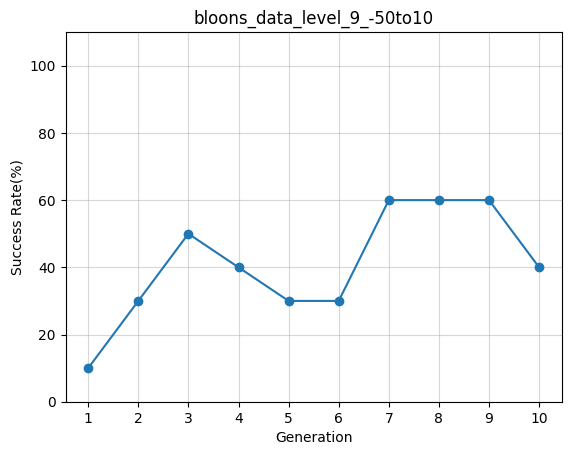

In [42]:
import matplotlib.pyplot as plt
plt.plot(success_rate['generation'],success_rate['success'],linestyle='-',marker='o')
plt.ylim(0, 110)
plt.title(database_name)
plt.xlabel('Generation')
plt.xticks([i+1 for i in range(10)])
plt.ylabel('Success Rate(%)')
plt.grid(True,alpha=0.5)
plt